### Support Vector Machine

SVM is capable of performing linear or nonlinear classification, regression and outlier detection.
SVM is well suited for classification of complex but small or medium sized datasets.

## 1. Linear SVM Classification

SVM classifier is trying to fit the widest possible line with borders between classes. (Large margin classifier) 

Adding more training instances that are outside the line with its borders does not influence the decision boundary. Instances located on on the borders are colled support vectors.

In [1]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [2]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

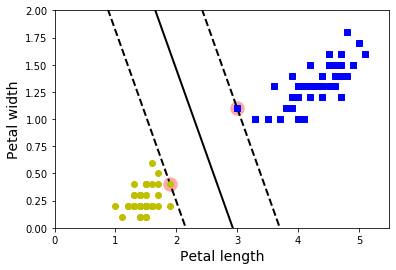

In [4]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()


SVMs are also very sensitive to the feature scales. Sometimes it needs feature scaling for the decision boundary to work correctly.

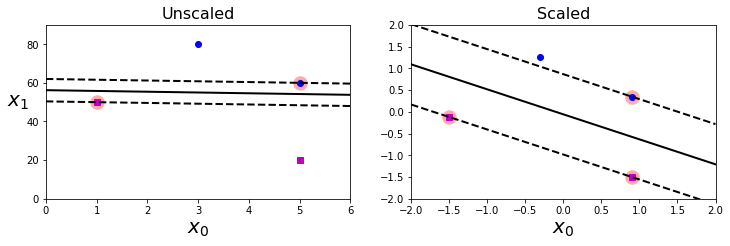

In [5]:
from sklearn.preprocessing import StandardScaler


Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

## 1.1 Soft margin classification

When we want to force, that all instances will be to the right from the line and its borders, we will call it hard margin classification (but it works only on linearly separable data and is very sensitive to outliers).

To tackle these problems we can use more flexible model which finds a good balance between keeping the borders wide as possible and minimizing the margin violations. And this is called soft margin classification.


In scikit it is possible to control that balance by using the C hyperparameter. Small value of C leads to wider borders with more margin violations and high value of C will imply less margin violations with smaller margin.
In case of model overfitting you can regularize it by reducing the C hyperparameter.

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")), 
))
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

SVM models do not output probabilities as predicitons.

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 2. Nonlinear SVM Classification

For datasets that are not linearly separable we can add more features, for example polynomial features and sometimes it can result in linearly separable dataset.

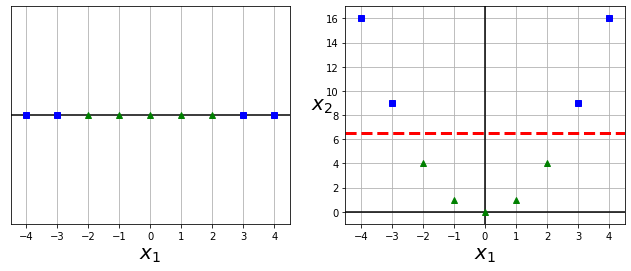

In [8]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.show()

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

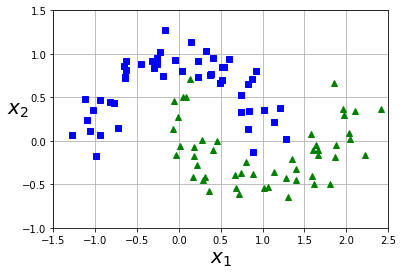

In [10]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

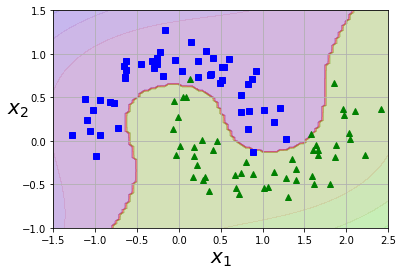

In [11]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## 2.1 Polynomial Kernel

Another way for tackling not linearly separable datasets is to use so called kernel trick. It makes it possible to get the same result as if you added many polynomial features. It gives the same result as adding many polynomial features without having to add them (faster). It is implemented by SVC class.

In [12]:
from sklearn.svm import SVC 

poly_kernel_svm_clf = Pipeline((        
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) 
))
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

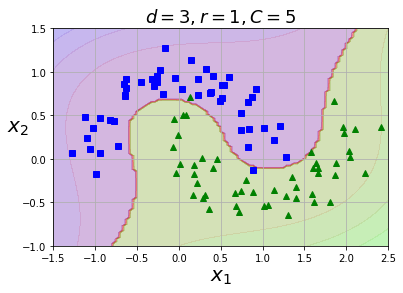

In [13]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
plt.show()

## 2.2 Gaussian RBF Kernel

Other technique is to add features computed using a similarity function that measures how much each instance resembles a particular landmark.

Gaussian RBF:

\begin{equation*}
\phi \gamma(x, \ell) = exp(-\gamma|| x - \ell ||^2)
\end{equation*}

It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).

We add two landmarks to it at $x_1$ = –2 and $x_1$ = 1

To compute the new features let’s look at the instance $x_1$ = –1: it is located at a distance of 1 from the first landmark, and 2 from the second landmark. Therefore its new features are $x_2$ = exp (–0.3 × 12) ≈ 0.74 and $x_3$ = exp (–0.3 × 22) ≈ 0.30.

The simplest approach is to create a landmark at the location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable.

The similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features.

But we can again use the kernel trick to obtain similar result without actually computing them.

In [14]:
rbf_kernel_svm_clf = Pipeline(( 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) 
))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

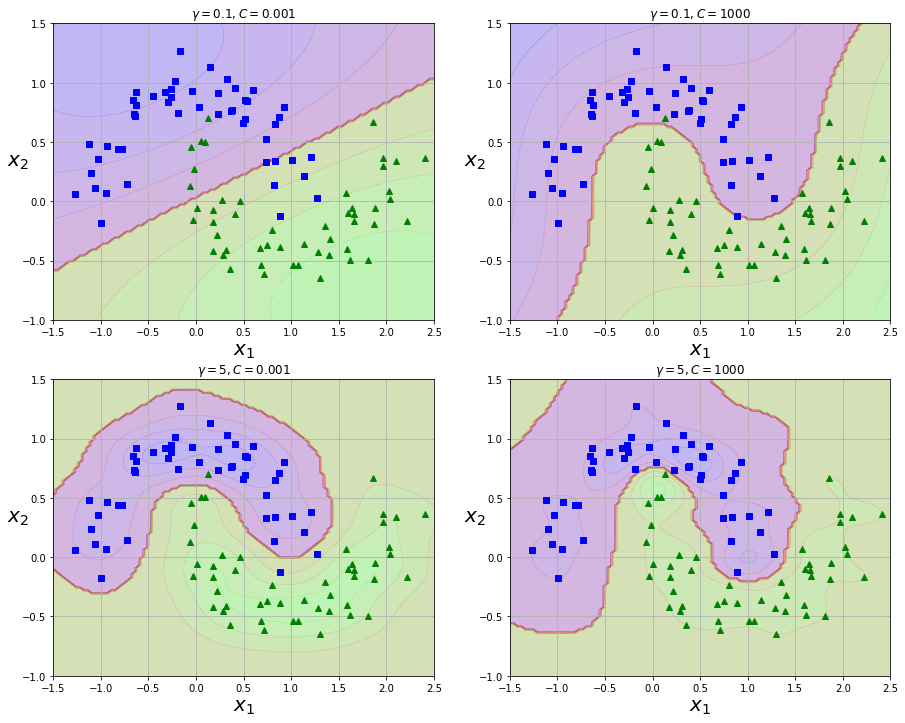

In [15]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(15, 12))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"$\gamma = {gamma}, C = {C}$", fontsize=12)

plt.show()

### SVM Regression

In this case the model instead of trying to fit the widest possible borders of line between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible within the borders of the line while limiting margin violations.
The width between borders is controlled by a hyperparameter $\epsilon$. 

In [16]:
from sklearn.svm import LinearSVR 
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

To tackle nonlinear regression tasks, you can use a kernelized SVM model. 

In [17]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## 3. How it works

Here the bias term will be *b* and the feature weights vector will be called *w*.

### 3.1 Decision Function and Predictions

Linear SVM classifier model predicts the class of a new instance x by computing the decision function __w__$^T \cdot$ __x__ + b = $w_1x_1 + w_2x_2 + ... + w_nx_n$

If the result is positive, the predicted class $\hat{y}$ is the positive class (1), or else it is the negative class (0)

Linear SVM classifier prediction:
\begin{equation*}
\left\{\begin{array}{l}\text{0  if } \textbf{w}^T \cdot x + b < 0\\\text{1  if } \textbf{w}^T \cdot x + b \ge 0\end{array}\right.
\end{equation*}

![title](img/svm_dec_func.png)
Source: Hands on Machine Learning with Scikit-Learn and Keras

Training a linear SVM classifier means finding the value of __w__ and b that make the margin as wide as possible while avoiding margin violations.

### 3.2 Training Objective

The slope of the decision function is equal to the norm of the weight vector, || __w__ ||.

Dividing this slope by 2, the points where the decision function is equal to $\pm$1 are going to be twice as far away from the decision boundary, so dividing the slope by 2 will multiply the margin by 2.


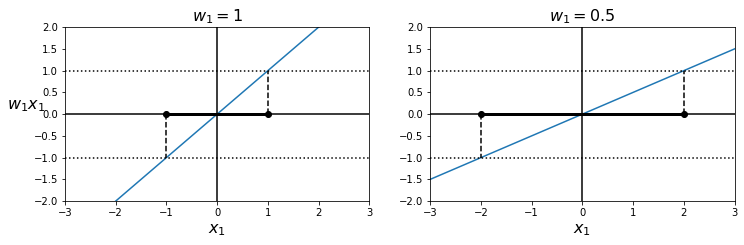

In [18]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

So the objective is to minimize || __w__ || in order to get large margin. But we also want to avoid any margin violation, then we need the decision function to be greater than 1 for all positive training instances and lower than –1 for negative training instances.

If we define $t^{(i)}$ = –1 for negative instances (if $y^{(i)}$ = 0) and $t^{(i)}$ = 1 for positive instances (if $y^{(i)}$ = 1), then we can express this constraint as $t^{(i)}(\textbf{w}^T \cdot \textbf{x}^{(i)} + b) \ge 1$ for all instances.

We can express the hard margin linear SVM classifier objective as the constrained optimization problem:

\begin{equation}
\underset{\textbf{w}, b}{\text{minimize}} \frac{1}{2} \textbf{w}^T \cdot \textbf{w}
\end{equation}

subject to 
\begin{equation}
t^{(i)}(\textbf{w}^T \cdot \textbf{x}^{(i)} + b) \ge 1
\end{equation}

for i = 1, 2, ..., m

In order to have soft margin objective, we introduce a _slack variable_ $\zeta^{(i)} \ge 0$ for each instance, where $\zeta^{(i)}$ measures how much the i^{th} instance is allowed to validate the margin.
Now we have to objectives, making the slack variables as small as possible to
reduce the margin violations, and making $\frac{1}{2} \textbf{w}^T \cdot \textbf{w}$ as small as possible to increase the margin.

And now the C hyperparameter allows us to define the tradeoff between these two objectives.

Soft margin linear SVM classifier objective:
\begin{equation}
\underset{\textbf{w}, b, \zeta}{\text{minimize}} \frac{1}{2} \textbf{w}^T \cdot \textbf{w} + C \sum_{i=1}^{m} \zeta^{(i)}
\end{equation}

\begin{equation}
\text{subject to } t^{(i)}(\textbf{w}^T \cdot \textbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \text{ and } \zeta^{(i)} \ge 0 \text{ for i = 1, 2, .., m}
\end{equation}

### 3.3 Quadratic Programming

The hard margin and soft margin problems are both convex quadratic optimization problems with linear constraints. Such problems are known as Quadratic Programming (QP) problems. 

Quadratic Programming problem:
\begin{equation}
\underset{p}{\text{minimize }} \frac{1}{2} \textbf{p}^T \cdot \textbf{H} \cdot \textbf{p} + \textbf{f}^T \cdot \textbf{p}
\end{equation}

\begin{equation}
\text{subject to } \textbf{A} \cdot \textbf{p} \le \textbf{b}
\end{equation}

where:
- __p__ is an $n_p$ dimensional vector, $n_p$ is number of parameters
- __H__ is and $n_p \times n_p$ matrix
- __f__ is an $n_p$ dimensional vector
- __A__ is an $n_c \times n_p$ matrix, $n_c$ is number of constraints
- __b__ is an $n_c$ dimensional vector

And by setting the QP parameters in the following way, we get the hard margin linear SVM classifier objective:
- $n_p$ = n + 1, where n is the number of features, (+1 is the bias term)
- $n_c$ = m , m = number of training instances
- __H__ is he $n_p \times n_p$ identity matrix, except with a zero in the top-left cell (to ignore the bias term)
- __f__ = 0, an $n_p$ dimensional vector full of 0s
- __b__ = 1, an $n_c$ dimensional vector full of 1s
- $\textbf{a}^{(i)} = -t^{(i)}\dot{\textbf{x}}^{(i)}$, where $\dot{\textbf{x}}^{(i)}$ is equal to $\textbf{x}^{(i)}$ with an extra bias feature $\dot{\textbf{x}}_0$ = 1

So it is possible to solve it using one of implemented QP solvers by passing the parameters and the resulting vector __p__ will contain the bias term b = $p_0$ and the feature weights $w_i = p_i$ for i = 1, 2, ..., m.
It is also possible to use that to solve the soft margin problem. 

### 3.4 The Dual Problem

In order to use the kernel trick we are going to look at a different constrained optimization problem, which is  closely related problem to our primal problem but different. This is the dual problem.

The solution to the dual problem typically gives a lower bound to the solution of the primal problem, but under some conditions it can even have the same solutions as the primal problem and the SVM problem happens to meet these condition.

Dual form of the linear SVM objective:
\begin{equation}
\underset{\alpha}{\text{minimize }} \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m}  \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} x^{(i)} \cdot x^{(j)} - \sum_{i=1}^{m} \alpha^{(i)}
\end{equation}

\begin{equation}
\text{subject to } \alpha \ge 0 for i = 1, 2, ..., m
\end{equation}

When we find the vector $\hat{\alpha}$ that minimizes this equation, we can compute $\hat{\textbf{w}}$ and $\hat{b}$ that minimize the primal problem using the equation below:

From the dual solution to the primal solution (*)



\begin{equation}
\hat{\textbf{w}} = \sum_{i=1}^{m} \hat{\alpha}^{(i)}t^{(i)}x^{(i)}
\end{equation}

\begin{equation}
\hat{b} = \frac{1}{n_s} \sum_{i=1, \hat{\alpha}^{(i)} \gt 0}^{m}  (1 - t^{(i)}(\hat{\textbf{w}}^T \cdot \textbf{x}^{(i)}))
\end{equation}

The dual problem is faster to solve than the primal when the number of training instances is smaller than the number of features. Moreover it makes the kernel trick possible, while the primal does not.

### 3.5 Kernelized SVM

We will work on an example of a $2^{nd}$ degree polynomial transformation. We want to apply it to a two dimensional training set and next train Linear SVM on it.

Second-degree polynomial mapping:
![source](img/mapping.png)

Kernel trick for a 2nd-degree polynomial mapping
![source](img/trick.png)

The dot product of the transformed vectors is equal to the square of the dot product of the original vectors.
$\phi(a)^T \cdot \phi(b) = (a^T \cdot b)^2$

If we apply the transformation $\phi$ to all training instances, then the dual problem will contain the dot product $\phi(x^{(i)})^T \cdot \phi(x^{(j)})$.

But if $\phi$ is the 2nd-degree polynomial transformation then you we replace this dot product of transformed vectors simply by $(x^{(i)^T} \cdot x^{(j)})^2$.

The result will be strictly the same as if we went through the trouble of actually transforming the training set then fitting a linear SVM algorithm. This is the essence of the kernel trick.

In Machine Learning, a kernel is a function capable of computing the dot product $\phi(a)^T \cdot \phi(b)$ based only on the original vectors a and b, without having to compute (or even to know about) the transformation $\phi$. 

To go from the dual solution to the primal solution in the case of a linear SVM classifier, $\hat{\textbf{w}}$ must have the same number of dimensions as $\phi(x^{(i)})$ which may be huge or even infinite, so we can’t compute it. But we can make predictions without knowing $\hat{\textbf{w}}$ simply by plugging in the formula (\*) for $\hat{\textbf{w}}$  into the decision function for a new instance $x^{(n)}$ and we get an equation with only dot products between input vectors.

Making predictions with a kernelized SVM:
![source](img/svm_predict.png)

Computing the bias term using the kernel trick:
![source](img/svm_bias_compute.png)

